In [7]:
!pip install pulp

   ---------------------------------------- 0.0/17.7 MB ? eta -:--:--
   ---------------------------------------- 0.0/17.7 MB 640.0 kB/s eta 0:00:28
   ---------------------------------------- 0.0/17.7 MB 640.0 kB/s eta 0:00:28
   ---------------------------------------- 0.1/17.7 MB 508.4 kB/s eta 0:00:35
   ---------------------------------------- 0.1/17.7 MB 508.4 kB/s eta 0:00:35
   ---------------------------------------- 0.2/17.7 MB 610.0 kB/s eta 0:00:29
   ---------------------------------------- 0.2/17.7 MB 692.9 kB/s eta 0:00:26
   ---------------------------------------- 0.2/17.7 MB 692.9 kB/s eta 0:00:26
   ---------------------------------------- 0.2/17.7 MB 692.9 kB/s eta 0:00:26
    --------------------------------------- 0.3/17.7 MB 752.2 kB/s eta 0:00:24
    --------------------------------------- 0.3/17.7 MB 752.2 kB/s eta 0:00:24
    --------------------------------------- 0.4/17.7 MB 714.4 kB/s eta 0:00:25
    --------------------------------------- 0.4/17.7 MB 714.4

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [13]:
df=pd.read_csv(r'C:\Users\k18at\Downloads\bakery_optimization_dataset.csv')

In [15]:
df

,Cake Type,Flour (kg),Sugar (kg),Eggs (units),Profit ($)
0,Chocolate Cake,2,1,1,5
1,Vanilla Cake,3,2,2,7


In [17]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Cake Type     2 non-null      object
 1   Flour (kg)    2 non-null      int64 
 2   Sugar (kg)    2 non-null      int64 
 3   Eggs (units)  2 non-null      int64 
 4   Profit ($)    2 non-null      int64 
dtypes: int64(4), object(1)
memory usage: 212.0+ bytes


In [21]:
print(df.describe())

       Flour (kg)  Sugar (kg)  Eggs (units)  Profit ($)
count    2.000000    2.000000      2.000000    2.000000
mean     2.500000    1.500000      1.500000    6.000000
std      0.707107    0.707107      0.707107    1.414214
min      2.000000    1.000000      1.000000    5.000000
25%      2.250000    1.250000      1.250000    5.500000
50%      2.500000    1.500000      1.500000    6.000000
75%      2.750000    1.750000      1.750000    6.500000
max      3.000000    2.000000      2.000000    7.000000


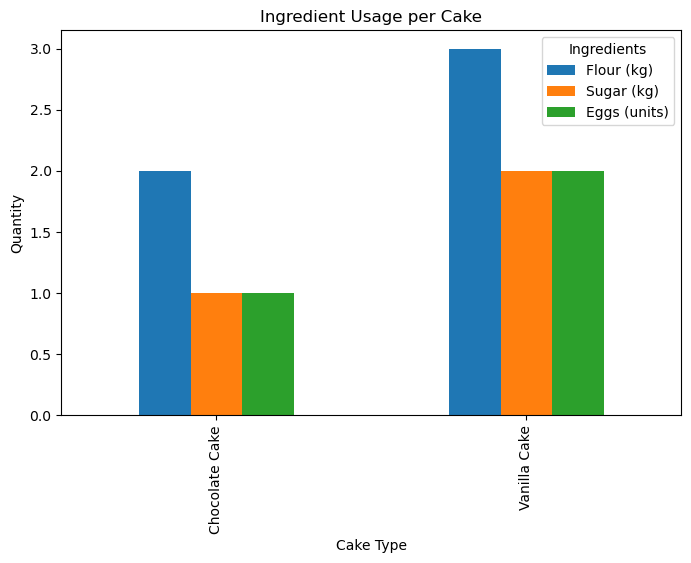

In [23]:
import matplotlib.pyplot as plt

df.set_index("Cake Type", inplace=True)

df.iloc[:, :-1].plot(kind="bar", figsize=(8, 5))
plt.title("Ingredient Usage per Cake")
plt.xlabel("Cake Type")
plt.ylabel("Quantity")
plt.legend(title="Ingredients")
plt.show()

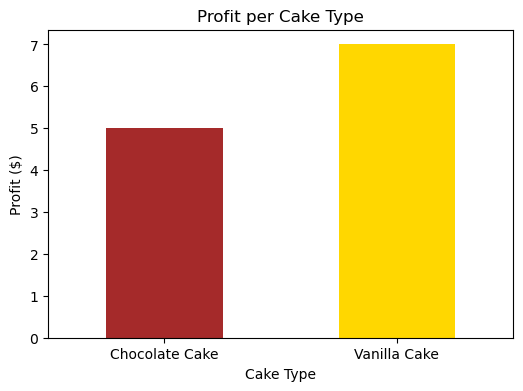

In [25]:
df["Profit ($)"].plot(kind="bar", color=["brown", "gold"], figsize=(6, 4))
plt.title("Profit per Cake Type")
plt.ylabel("Profit ($)")
plt.xlabel("Cake Type")
plt.xticks(rotation=0)
plt.show()

In [9]:
from pulp import LpMaximize, LpProblem, LpVariable, value

model = LpProblem(name="bakery-optimization", sense=LpMaximize)

chocolate_cakes = LpVariable(name="Chocolate_Cakes", lowBound=0, cat="Integer")
vanilla_cakes = LpVariable(name="Vanilla_Cakes", lowBound=0, cat="Integer")

model += (5 * chocolate_cakes + 7 * vanilla_cakes, "Total_Profit")

model += (2 * chocolate_cakes + 3 * vanilla_cakes <= 50, "Flour_Constraint")
model += (1 * chocolate_cakes + 2 * vanilla_cakes <= 30, "Sugar_Constraint")
model += (1 * chocolate_cakes + 2 * vanilla_cakes <= 40, "Eggs_Constraint")

model.solve()

print(f"Optimal number of Chocolate Cakes to produce: {value(chocolate_cakes)}")
print(f"Optimal number of Vanilla Cakes to produce: {value(vanilla_cakes)}")
print(f"Maximum Profit: ${value(model.objective)}")


Optimal number of Chocolate Cakes to produce: 25.0
Optimal number of Vanilla Cakes to produce: 0.0
Maximum Profit: $125.0
